## Optuna Demo

#### Hyperparameter tuning

* Grid Search
* Random Search
* Derivative-free Optimization (e.g. Bayesian/SMBO, Genetic Algorithms, etc)

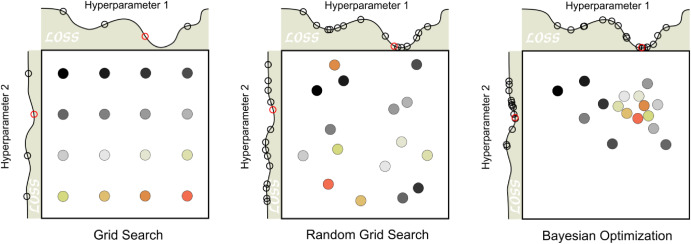

In [1]:



from IPython import display
display.Image('hppsearch.jpg')

#### Construimos dataset sintético: 
* balanceado
* 100 variables totales, 50 variables informativas 
* 100,000 observaciones
* 50 clusters por clase

In [1]:
from demo_utils import *

#random state
rs = 1

#timeout 
mins = 30

In [2]:
w1 = 0.5
w0 = 1 - w1
data = build_data(rs = rs,
                  n_features = 100, 
                  n_informative = 50, 
                  n_redundant = 0, 
                  n_samples = 100000, 
                  n_clusters = 50,
                  weights = [w0, w1],
                  flip_y = 0.0,
                  class_sep = 2)
data

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,N41,N42,N43,N44,N45,N46,N47,N48,N49,label
0,3.614418,1.177552,-9.963872,-4.622034,1.242912,0.139697,7.581284,-4.468906,6.493326,-8.851239,...,-0.886287,1.505121,-0.370822,1.306539,-1.464942,0.630981,0.342583,-0.003403,0.062432,0
1,-2.879539,-0.331157,-4.597786,5.781025,1.825950,1.344481,-4.357488,4.969976,0.967193,1.595709,...,0.477890,-0.271222,1.231108,1.077667,1.143746,-1.614987,-1.639725,0.947642,0.581428,0
2,-7.473326,-3.579702,-0.734587,-7.858546,-2.604439,-6.541936,-4.188057,-2.931347,-6.314613,5.019229,...,-0.225194,-1.100866,-0.637056,0.862679,-0.820266,-0.733194,-0.727195,0.892507,0.410359,0
3,11.491159,-2.202708,-7.540700,-0.508705,3.321450,-1.037375,-5.691637,0.990096,-5.048492,-1.671817,...,0.017401,1.236916,-0.228213,0.313580,-0.713925,1.139020,0.296841,1.990470,-1.402202,0
4,1.346782,-3.968487,-3.474407,-0.370010,7.401459,1.017013,-5.264145,-2.324666,-8.298444,-0.527339,...,0.463439,-1.290284,1.965997,0.516833,0.782500,0.098413,-0.517193,-1.490678,1.088255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.870633,0.107791,-2.618994,-2.688046,1.029055,0.018591,-2.115691,7.012798,-1.466588,1.480291,...,1.946403,-0.351913,1.920022,0.556180,1.968358,0.114230,0.276924,-1.540002,-0.139935,1
99996,4.645332,-6.067185,-4.170576,-5.480108,1.850130,-7.648956,-6.100867,1.931591,2.098956,-3.568533,...,0.487284,-1.043838,-0.890005,-0.337671,-0.466034,-0.576768,0.240014,2.719386,-0.854458,1
99997,-0.799866,-2.298291,-9.600203,6.943880,2.106429,-1.472919,0.850955,-3.658463,3.001285,2.826427,...,-0.996427,-0.903006,-0.485341,0.597171,-0.695945,1.690052,-0.471424,-1.351535,-0.476468,1
99998,-2.440243,-3.645514,1.690248,-1.596008,-0.042493,-4.881584,-0.114599,-0.859336,-1.603052,6.196127,...,-1.360476,-0.910066,2.172484,1.150463,-1.941808,-2.539821,0.436540,-0.980325,1.124215,1


#### Data-split:

* 20% de la data se va a dejar fuera de los procesos de experimentación, y se utilizará para validar los modelos optimizados.

In [3]:
X, y = data.drop('label', axis=1), data['label']

X_dev, X_val, y_dev, y_val = train_test_split(X, y,
                                              train_size = 0.8, 
                                              random_state = rs,
                                              shuffle = True,
                                              stratify = y)

#### Comparación de modelos a optimizar 

* LGBM & CatBoost out-of-the-box vs modelos de baja complejidad (árbol de decisión y regresión logística) como baseline y un clasificador dummy (aleatorio)
* 4-fold cross-validation
* CatBoost tiene mejor poder predictivo (respecto al F1 score) pero es el más lento (y tiene parámetros por default más complejos)


In [5]:
compare_models(X_dev = X_dev, y_dev = y_dev, rs = rs)

,LightGBM,CatBoost,DecisionTree,LogisticRregression,Dummy
split_1,0.595747,0.639083,0.520246,0.550893,0.505163
split_2,0.594668,0.651427,0.514509,0.543120,0.495739
split_3,0.595055,0.641935,0.514211,0.549256,0.503258
split_4,0.589590,0.635202,0.518645,0.548859,0.504762
Avg,0.593765,0.641912,0.516903,0.548032,0.502231
,LightGBM,CatBoost,DecisionTree,LogisticRregression,Dummy
split_1,1.313769,12.076748,7.118227,0.207780,0.036052
split_2,1.349561,12.238524,7.139512,0.303422,0.022581
split_3,1.288739,12.426966,7.194475,0.200821,0.023646
split_4,1.275270,12.281680,7.009777,0.216110,0.022219


#### LightGBM Optimization
* Cross-validation
* TPE algorithm
* 100 max trials
* 30 mins timeout

Resultados: 
<br>
25 trials completadas 
<br>
De 0.59 a 0.65 en F1
<br>
En set de validación: .67

In [6]:
study = optimize_fn(X = X_dev, y = y_dev, objective_fn = objective_fn, n_trials = 100, timeout = 60*mins, rs = rs, verbose = -1)

[I 2022-10-06 16:59:18,760] A new study created in memory with name: LightGBM_Optimization
[I 2022-10-06 16:59:24,824] Trial 0 finished with value: 0.5651119925273325 and parameters: {'boosting_type': 'goss', 'n_estimators': 100, 'max_depth': 4.0, 'num_leaves': 92}. Best is trial 0 with value: 0.5651119925273325.
[I 2022-10-06 16:59:42,991] Trial 1 finished with value: 0.5785172309124621 and parameters: {'boosting_type': 'goss', 'n_estimators': 411, 'max_depth': 6.0, 'num_leaves': 285}. Best is trial 1 with value: 0.5785172309124621.
[I 2022-10-06 16:59:54,003] Trial 2 finished with value: 0.5748325217598469 and parameters: {'boosting_type': 'goss', 'n_estimators': 284, 'max_depth': 14.0, 'num_leaves': 33}. Best is trial 1 with value: 0.5785172309124621.


[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=20, subsample_freq=0 will be ignored. Current value: bagging_freq=20
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=20, subsample_freq=0 will be ignored. Current value: bagging_freq=20
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=20, subsample_freq=0 will be ignored. Current value: bagging_freq=20
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=20, subsample_freq=0 will be ignored. Current value: bagging_freq=20


[I 2022-10-06 17:00:02,498] Trial 3 finished with value: 0.5673062305069256 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 603, 'max_depth': 2.0, 'num_leaves': 117, 'bagging_freq': 20.0, 'bagging_fraction': 1.0}. Best is trial 1 with value: 0.5785172309124621.
[I 2022-10-06 17:00:43,684] Trial 4 finished with value: 0.5913159241803025 and parameters: {'boosting_type': 'goss', 'n_estimators': 889, 'max_depth': 16.0, 'num_leaves': 61}. Best is trial 4 with value: 0.5913159241803025.
[I 2022-10-06 17:02:56,492] Trial 5 finished with value: 0.6029704460220549 and parameters: {'boosting_type': 'goss', 'n_estimators': 891, 'max_depth': 0.0, 'num_leaves': 227}. Best is trial 5 with value: 0.6029704460220549.


[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=25, subsample_freq=0 will be ignored. Current value: bagging_freq=25
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=25, subsample_freq=0 will be ignored. Current value: bagging_freq=25
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=25, subsample_freq=0 will be ignored. Current value: bagging_freq=25
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=25, subsample_freq=0 will be ignored. Current value: bagging_freq=25


[I 2022-10-06 17:03:20,109] Trial 6 finished with value: 0.5988147591575401 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 723, 'max_depth': 4.0, 'num_leaves': 358, 'bagging_freq': 25.0, 'bagging_fraction': 0.5}. Best is trial 5 with value: 0.6029704460220549.
[I 2022-10-06 17:03:39,792] Trial 7 finished with value: 0.580507570179645 and parameters: {'boosting_type': 'goss', 'n_estimators': 774, 'max_depth': 4.0, 'num_leaves': 409}. Best is trial 5 with value: 0.6029704460220549.
[I 2022-10-06 17:03:56,883] Trial 8 finished with value: 0.5822155199661679 and parameters: {'boosting_type': 'goss', 'n_estimators': 918, 'max_depth': 4.0, 'num_leaves': 161}. Best is trial 5 with value: 0.6029704460220549.


[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2022-10-06 17:04:05,694] Trial 9 finished with value: 0.5688848135440956 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 711, 'max_depth': 2.0, 'num_leaves': 150, 'bagging_freq': 10.0, 'bagging_fraction': 0.5}. Best is trial 5 with value: 0.6029704460220549.


[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2022-10-06 17:06:22,906] Trial 10 finished with value: 0.6444062874825103 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 981, 'max_depth': 10.0, 'num_leaves': 506, 'bagging_freq': 0.0}. Best is trial 10 with value: 0.6444062874825103.


[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2022-10-06 17:08:18,778] Trial 11 finished with value: 0.6429490949302283 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 921, 'max_depth': 10.0, 'num_leaves': 460, 'bagging_freq': 0.0}. Best is trial 10 with value: 0.6444062874825103.


[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2022-10-06 17:10:20,942] Trial 12 finished with value: 0.6419765814755969 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 958, 'max_depth': 10.0, 'num_leaves': 510, 'bagging_freq': 0.0}. Best is trial 10 with value: 0.6444062874825103.


[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2022-10-06 17:12:25,290] Trial 13 finished with value: 0.6426356317120564 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 982, 'max_depth': 10.0, 'num_leaves': 510, 'bagging_freq': 0.0}. Best is trial 10 with value: 0.6444062874825103.


[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-10-06 17:14:03,562] Trial 14 finished with value: 0.6372323278244388 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 532, 'max_depth': 12.0, 'num_leaves': 424, 'bagging_freq': 5.0, 'bagging_fraction': 1.0}. Best is trial 10 with value: 0.6444062874825103.


[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2022-10-06 17:15:00,873] Trial 15 finished with value: 0.6241475967640868 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 798, 'max_depth': 8.0, 'num_leaves': 442, 'bagging_freq': 10.0, 'bagging_fraction': 0.7}. Best is trial 10 with value: 0.6444062874825103.


[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2022-10-06 17:16:32,517] Trial 16 finished with value: 0.639195647221723 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 601, 'max_depth': 12.0, 'num_leaves': 358, 'bagging_freq': 0.0}. Best is trial 10 with value: 0.6444062874825103.


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-10-06 17:17:30,344] Trial 17 finished with value: 0.631815755177435 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 841, 'max_depth': 8.0, 'num_leaves': 459, 'bagging_freq': 5.0, 'bagging_fraction': 0.8}. Best is trial 10 with value: 0.6444062874825103.


[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


[I 2022-10-06 17:19:28,558] Trial 18 finished with value: 0.6311308503996569 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 677, 'max_depth': 16.0, 'num_leaves': 330, 'bagging_freq': 15.0, 'bagging_fraction': 0.7}. Best is trial 10 with value: 0.6444062874825103.


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-10-06 17:21:14,035] Trial 19 finished with value: 0.6393942374834793 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 990, 'max_depth': 10.0, 'num_leaves': 224, 'bagging_freq': 5.0, 'bagging_fraction': 0.8}. Best is trial 10 with value: 0.6444062874825103.


[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2022-10-06 17:22:48,273] Trial 20 finished with value: 0.6397562336974231 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 465, 'max_depth': 12.0, 'num_leaves': 490, 'bagging_freq': 0.0}. Best is trial 10 with value: 0.6444062874825103.


[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2022-10-06 17:25:02,527] Trial 21 finished with value: 0.6456541348864405 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 990, 'max_depth': 10.0, 'num_leaves': 489, 'bagging_freq': 0.0}. Best is trial 21 with value: 0.6456541348864405.


[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-10-06 17:26:01,203] Trial 22 finished with value: 0.6340642891011186 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 833, 'max_depth': 8.0, 'num_leaves': 395, 'bagging_freq': 5.0, 'bagging_fraction': 0.9}. Best is trial 21 with value: 0.6456541348864405.


[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2022-10-06 17:29:25,256] Trial 23 finished with value: 0.6478992404489161 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 895, 'max_depth': 14.0, 'num_leaves': 464, 'bagging_freq': 0.0}. Best is trial 23 with value: 0.6478992404489161.


In [7]:
study.best_value

0.6478992404489161

In [8]:
study.best_params

{'boosting_type': 'gbdt',
 'n_estimators': 895,
 'max_depth': 14.0,
 'num_leaves': 464,
 'bagging_freq': 0.0}

In [9]:

lgbm_params = {'boosting_type': 'gbdt',
               'n_estimators': 895,
               'max_depth': 14,
               'num_leaves': 464,
               'bagging_freq': 0,
               'learning_rate': 0.1,
               'seed': rs,
               'verbose': -1
               }

lgbm_model = lgbm.LGBMClassifier(**lgbm_params)

lgbm_model.fit(X_dev, y_dev)

lgbm_preds = lgbm_model.predict(X_val)

print(f"F1 on validation set: {f1_score(y_true=y_val, y_pred=lgbm_preds)}")

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
F1 on validation set: 0.6672685324505968


##### Visualization

In [10]:
optuna.visualization.plot_optimization_history(study)

In [11]:
optuna.visualization.plot_param_importances(study)

In [12]:
optuna.visualization.plot_contour(study, params = ['num_leaves',  'max_depth'])

#### Pruning

* Early stopping rounds + Median Pruner
* TPE algorithm
* 200 trials potenciales (muchos no se completarán)
* 200 trials con 60 mins timeout & 100 trials con 30 mins timeout

Resultados:
* 100 trials 30 mins timeout --> 5 trials completados. De 0.64 a 0.66 en F1
* 200 trials 60 mins timeout --> 22 trials completados. De 0.64 a 0.67 en F1. En set de validación: 0.68

In [4]:
study_p = optimize_fn_p(X = X_dev, y = y_dev, objective_fn = objective_fn_p, n_trials = 100, timeout = 2*60*mins, rs = rs, verbose = 100)

[I 2022-10-07 08:44:27,049] A new study created in memory with name: CatBoost_Optimization_w_Pruning


Model params: {'l2_leaf_reg': 8, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 4, 'eval_metric': 'F1', 'boosting_type': 'Ordered', 'max_depth': 4, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.5381562	test: 0.5335562	best: 0.5335562 (0)	total: 89.1ms	remaining: 2m 58s
100:	learn: 0.5717754	test: 0.5557398	best: 0.5568440 (88)	total: 2.93s	remaining: 55.1s
200:	learn: 0.5805784	test: 0.5547644	best: 0.5576272 (117)	total: 5.62s	remaining: 50.3s
300:	learn: 0.5863822	test: 0.5592905	best: 0.5592905 (300)	total: 8.35s	remaining: 47.1s
400:	learn: 0.5938374	test: 0.5654229	best: 0.5669213 (375)	total: 11.2s	remaining: 44.6s
500:	learn: 0.6102694	test: 0.5734991	best: 0.5747958 (486)	total: 14.1s	remaining: 42.3s
600:	learn: 0.6233563	test: 0.5822658	best: 0.5831771 (597)	total: 16.9s	remaining: 39.4s
700:	learn: 0.6346043	test: 0.5885589	best: 0.5888084 (697)	total: 19.7s	remaining: 36.5s
800:	learn: 0.6439084	test:

[I 2022-10-07 08:45:25,951] Trial 0 finished with value: 0.6181864011594934 and parameters: {'random_strength': 4, 'l2_leaf_reg': 8, 'max_depth': 4.0, 'grow_policy': 'SymmetricTree', 'boosting_type': 'Ordered'}. Best is trial 0 with value: 0.6181864011594934.


1999:	learn: 0.7058344	test: 0.6177305	best: 0.6181864 (1975)	total: 56s	remaining: 0us

bestTest = 0.6181864012
bestIteration = 1975

Shrink model to first 1976 iterations.
0.6181864011594934
Model params: {'l2_leaf_reg': 6, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 4, 'eval_metric': 'F1', 'max_depth': 6, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'Lossguide', 'max_leaves': 21}
0:	learn: 0.5057770	test: 0.5038264	best: 0.5038264 (0)	total: 23.9ms	remaining: 47.9s
100:	learn: 0.5818918	test: 0.5557952	best: 0.5797247 (1)	total: 2.32s	remaining: 43.6s


[I 2022-10-07 08:45:30,731] Trial 1 finished with value: 0.579724683720671 and parameters: {'random_strength': 4, 'l2_leaf_reg': 6, 'max_depth': 6.0, 'grow_policy': 'Lossguide', 'max_leaves': 21}. Best is trial 0 with value: 0.6181864011594934.


200:	learn: 0.5929527	test: 0.5580589	best: 0.5797247 (1)	total: 4.53s	remaining: 40.6s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.5797246837
bestIteration = 1

Shrink model to first 2 iterations.
0.579724683720671
Model params: {'l2_leaf_reg': 5, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 7, 'eval_metric': 'F1', 'max_depth': 7, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'Lossguide', 'max_leaves': 63}
0:	learn: 0.5139384	test: 0.5160063	best: 0.5160063 (0)	total: 37.5ms	remaining: 1m 14s
100:	learn: 0.6092728	test: 0.5537443	best: 0.5538269 (98)	total: 3.87s	remaining: 1m 12s
200:	learn: 0.6295409	test: 0.5614973	best: 0.5624301 (195)	total: 7.65s	remaining: 1m 8s
300:	learn: 0.6428294	test: 0.5650068	best: 0.5664955 (277)	total: 11.5s	remaining: 1m 4s
400:	learn: 0.6580275	test: 0.5675054	best: 0.5676432 (387)	total: 15.2s	remaining: 1m
500:	learn: 0.7098610	test: 0.5838168	best: 0.5842249 (487)	total: 19.2s

[I 2022-10-07 08:46:56,954] Trial 2 finished with value: 0.6352926431883694 and parameters: {'random_strength': 7, 'l2_leaf_reg': 5, 'max_depth': 7.0, 'grow_policy': 'Lossguide', 'max_leaves': 63}. Best is trial 2 with value: 0.6352926431883694.


1999:	learn: 0.9872166	test: 0.6325762	best: 0.6352926 (1942)	total: 1m 23s	remaining: 0us

bestTest = 0.6352926432
bestIteration = 1942

Shrink model to first 1943 iterations.
0.6352926431883694
Model params: {'l2_leaf_reg': 8, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 3, 'eval_metric': 'F1', 'boosting_type': 'Ordered', 'max_depth': 10, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.5765446	test: 0.5448194	best: 0.5448194 (0)	total: 482ms	remaining: 16m 3s
100:	learn: 0.7321086	test: 0.5711280	best: 0.5726290 (66)	total: 50.8s	remaining: 15m 55s
200:	learn: 0.7939927	test: 0.5791592	best: 0.5812272 (180)	total: 1m 41s	remaining: 15m 4s
300:	learn: 0.8371360	test: 0.5844091	best: 0.5879070 (256)	total: 2m 30s	remaining: 14m 12s
400:	learn: 0.8682701	test: 0.5943960	best: 0.5952233 (393)	total: 3m 20s	remaining: 13m 20s
500:	learn: 0.8812625	test: 0.6057428	best: 0.6057428 (500)	total: 4m 10s	remaining: 12m 29

[I 2022-10-07 09:04:08,398] Trial 3 finished with value: 0.6570532915360501 and parameters: {'random_strength': 3, 'l2_leaf_reg': 8, 'max_depth': 10.0, 'grow_policy': 'SymmetricTree', 'boosting_type': 'Ordered'}. Best is trial 3 with value: 0.6570532915360501.


1999:	learn: 0.9710197	test: 0.6559679	best: 0.6570533 (1980)	total: 17m 7s	remaining: 0us

bestTest = 0.6570532915
bestIteration = 1980

Shrink model to first 1981 iterations.
0.6570532915360501
Model params: {'l2_leaf_reg': 5, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 1, 'eval_metric': 'F1', 'max_depth': 10, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'Depthwise'}
0:	learn: 0.6030038	test: 0.5434635	best: 0.5434635 (0)	total: 314ms	remaining: 10m 27s
100:	learn: 0.9181074	test: 0.5925098	best: 0.5925098 (100)	total: 25.6s	remaining: 8m
200:	learn: 0.9698108	test: 0.6059888	best: 0.6087606 (189)	total: 48.2s	remaining: 7m 11s
300:	learn: 0.9878866	test: 0.6117207	best: 0.6138120 (269)	total: 1m 10s	remaining: 6m 35s
400:	learn: 0.9954494	test: 0.6172267	best: 0.6172267 (400)	total: 1m 30s	remaining: 6m
500:	learn: 0.9985775	test: 0.6223001	best: 0.6227500 (498)	total: 1m 49s	remaining: 5m 26s
600:	learn: 0.9996718	test: 0.6312578	bes

[I 2022-10-07 09:11:28,037] Trial 4 finished with value: 0.6543140557739098 and parameters: {'random_strength': 1, 'l2_leaf_reg': 5, 'max_depth': 10.0, 'grow_policy': 'Depthwise'}. Best is trial 3 with value: 0.6570532915360501.


0.6543140557739098
Model params: {'l2_leaf_reg': 9, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 7, 'eval_metric': 'F1', 'max_depth': 4, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'Depthwise'}
0:	learn: 0.5985591	test: 0.6031666	best: 0.6031666 (0)	total: 12.7ms	remaining: 25.5s
100:	learn: 0.5752158	test: 0.5590062	best: 0.6031666 (0)	total: 1.31s	remaining: 24.6s


[I 2022-10-07 09:11:30,879] Trial 5 finished with value: 0.6031665739288784 and parameters: {'random_strength': 7, 'l2_leaf_reg': 9, 'max_depth': 4.0, 'grow_policy': 'Depthwise'}. Best is trial 3 with value: 0.6570532915360501.


200:	learn: 0.5819550	test: 0.5598468	best: 0.6031666 (0)	total: 2.6s	remaining: 23.3s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6031665739
bestIteration = 0

Shrink model to first 1 iterations.
0.6031665739288784
Model params: {'l2_leaf_reg': 9, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 3, 'eval_metric': 'F1', 'max_depth': 4, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'Depthwise'}
0:	learn: 0.5716657	test: 0.5784539	best: 0.5784539 (0)	total: 11.9ms	remaining: 23.8s
100:	learn: 0.5840727	test: 0.5639680	best: 0.5845656 (2)	total: 1.3s	remaining: 24.4s


[I 2022-10-07 09:11:33,737] Trial 6 finished with value: 0.5845655934378663 and parameters: {'random_strength': 3, 'l2_leaf_reg': 9, 'max_depth': 4.0, 'grow_policy': 'Depthwise'}. Best is trial 3 with value: 0.6570532915360501.


200:	learn: 0.5921776	test: 0.5677093	best: 0.5845656 (2)	total: 2.58s	remaining: 23.1s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.5845655934
bestIteration = 2

Shrink model to first 3 iterations.
0.5845655934378663
Model params: {'l2_leaf_reg': 3, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 3, 'eval_metric': 'F1', 'boosting_type': 'Plain', 'max_depth': 4, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.4776119	test: 0.4802000	best: 0.4802000 (0)	total: 7.67ms	remaining: 15.3s
100:	learn: 0.5712390	test: 0.5597098	best: 0.5623925 (95)	total: 810ms	remaining: 15.2s
200:	learn: 0.5807559	test: 0.5649592	best: 0.5652766 (196)	total: 1.6s	remaining: 14.3s
300:	learn: 0.5875910	test: 0.5661290	best: 0.5661290 (300)	total: 2.38s	remaining: 13.4s
400:	learn: 0.5983247	test: 0.5714994	best: 0.5731806 (390)	total: 3.19s	remaining: 12.7s
500:	learn: 0.6123591	test: 0.5775174	best: 0.5777086 (499)

[I 2022-10-07 09:11:53,058] Trial 7 finished with value: 0.6140823876105085 and parameters: {'random_strength': 3, 'l2_leaf_reg': 3, 'max_depth': 4.0, 'grow_policy': 'SymmetricTree', 'boosting_type': 'Plain'}. Best is trial 3 with value: 0.6570532915360501.


1999:	learn: 0.7118655	test: 0.6108808	best: 0.6140824 (1926)	total: 15.9s	remaining: 0us

bestTest = 0.6140823876
bestIteration = 1926

Shrink model to first 1927 iterations.
0.6140823876105085
Model params: {'l2_leaf_reg': 3, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 6, 'eval_metric': 'F1', 'boosting_type': 'Plain', 'max_depth': 8, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.4716093	test: 0.4570520	best: 0.4570520 (0)	total: 25.6ms	remaining: 51.2s
100:	learn: 0.6668003	test: 0.5626700	best: 0.5651825 (97)	total: 2.5s	remaining: 47s
200:	learn: 0.7058678	test: 0.5713223	best: 0.5724185 (189)	total: 5.11s	remaining: 45.8s
300:	learn: 0.7287665	test: 0.5758310	best: 0.5767176 (299)	total: 7.68s	remaining: 43.4s
400:	learn: 0.7572716	test: 0.5803878	best: 0.5817116 (388)	total: 10.2s	remaining: 40.5s
500:	learn: 0.7822254	test: 0.5990634	best: 0.5997630 (495)	total: 13.5s	remaining: 40.3s
600:	learn: 0.8054

[I 2022-10-07 09:12:49,171] Trial 8 finished with value: 0.6614864018047374 and parameters: {'random_strength': 6, 'l2_leaf_reg': 3, 'max_depth': 8.0, 'grow_policy': 'SymmetricTree', 'boosting_type': 'Plain'}. Best is trial 8 with value: 0.6614864018047374.


1999:	learn: 0.9576046	test: 0.6608521	best: 0.6614864 (1989)	total: 51.9s	remaining: 0us

bestTest = 0.6614864018
bestIteration = 1989

Shrink model to first 1990 iterations.
0.6614864018047374
Model params: {'l2_leaf_reg': 6, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 0, 'eval_metric': 'F1', 'max_depth': 8, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'Depthwise'}
0:	learn: 0.6002634	test: 0.5519324	best: 0.5519324 (0)	total: 74ms	remaining: 2m 27s
100:	learn: 0.8530103	test: 0.6110461	best: 0.6110461 (100)	total: 8.14s	remaining: 2m 33s
200:	learn: 0.9089438	test: 0.6188796	best: 0.6205103 (195)	total: 15.6s	remaining: 2m 19s
300:	learn: 0.9471121	test: 0.6232673	best: 0.6265432 (290)	total: 22.7s	remaining: 2m 7s
400:	learn: 0.9702732	test: 0.6271837	best: 0.6271837 (400)	total: 30s	remaining: 1m 59s
500:	learn: 0.9827085	test: 0.6311287	best: 0.6311287 (500)	total: 37.5s	remaining: 1m 52s
600:	learn: 0.9898349	test: 0.6293793	best:

[I 2022-10-07 09:15:10,106] Trial 9 finished with value: 0.6508647505288043 and parameters: {'random_strength': 0, 'l2_leaf_reg': 6, 'max_depth': 8.0, 'grow_policy': 'Depthwise'}. Best is trial 8 with value: 0.6614864018047374.


0.6508647505288043
Model params: {'l2_leaf_reg': 2, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 10, 'eval_metric': 'F1', 'boosting_type': 'Plain', 'max_depth': 8, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.4716093	test: 0.4570520	best: 0.4570520 (0)	total: 29.2ms	remaining: 58.4s


[I 2022-10-07 09:15:12,244] Trial 10 pruned. Trial was pruned at iteration 75.



bestTest = 0.5580902518
bestIteration = 65

Shrink model to first 66 iterations.
Model params: {'l2_leaf_reg': 3, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 7, 'eval_metric': 'F1', 'boosting_type': 'Ordered', 'max_depth': 10, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.5513295	test: 0.5221016	best: 0.5221016 (0)	total: 567ms	remaining: 18m 53s


[I 2022-10-07 09:15:54,708] Trial 11 pruned. Trial was pruned at iteration 75.



bestTest = 0.5587541879
bestIteration = 67

Shrink model to first 68 iterations.
Model params: {'l2_leaf_reg': 8, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 10, 'eval_metric': 'F1', 'boosting_type': 'Plain', 'max_depth': 9, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.5146925	test: 0.4972035	best: 0.4972035 (0)	total: 50.5ms	remaining: 1m 41s
100:	learn: 0.7351353	test: 0.5647775	best: 0.5668668 (94)	total: 4.06s	remaining: 1m 16s
200:	learn: 0.7769706	test: 0.5684552	best: 0.5716946 (163)	total: 8.08s	remaining: 1m 12s
300:	learn: 0.8135778	test: 0.5716425	best: 0.5733458 (262)	total: 12.1s	remaining: 1m 8s
400:	learn: 0.8388526	test: 0.5777113	best: 0.5791962 (399)	total: 16.1s	remaining: 1m 4s
500:	learn: 0.8564065	test: 0.5974010	best: 0.5987562 (493)	total: 20.2s	remaining: 1m
600:	learn: 0.8783378	test: 0.6175828	best: 0.6181500 (597)	total: 24.3s	remaining: 56.6s
700:	learn: 0.8967924	test: 0.6300650

[I 2022-10-07 09:17:21,744] Trial 12 finished with value: 0.6675856883263362 and parameters: {'random_strength': 10, 'l2_leaf_reg': 8, 'max_depth': 9.0, 'grow_policy': 'SymmetricTree', 'boosting_type': 'Plain'}. Best is trial 12 with value: 0.6675856883263362.


1999:	learn: 0.9891986	test: 0.6664161	best: 0.6675857 (1991)	total: 1m 22s	remaining: 0us

bestTest = 0.6675856883
bestIteration = 1991

Shrink model to first 1992 iterations.
0.6675856883263362
Model params: {'l2_leaf_reg': 10, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 10, 'eval_metric': 'F1', 'boosting_type': 'Plain', 'max_depth': 8, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.4716093	test: 0.4570520	best: 0.4570520 (0)	total: 26.3ms	remaining: 52.6s


[I 2022-10-07 09:17:23,153] Trial 13 pruned. Trial was pruned at iteration 50.



bestTest = 0.5492563321
bestIteration = 45

Shrink model to first 46 iterations.
Model params: {'l2_leaf_reg': 4, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 8, 'eval_metric': 'F1', 'boosting_type': 'Plain', 'max_depth': 9, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.5146925	test: 0.4972035	best: 0.4972035 (0)	total: 42.7ms	remaining: 1m 25s


[I 2022-10-07 09:17:25,491] Trial 14 pruned. Trial was pruned at iteration 50.



bestTest = 0.545938254
bestIteration = 37

Shrink model to first 38 iterations.
Model params: {'l2_leaf_reg': 7, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 9, 'eval_metric': 'F1', 'boosting_type': 'Plain', 'max_depth': 6, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.4879277	test: 0.4816133	best: 0.4816133 (0)	total: 12.6ms	remaining: 25.3s


[I 2022-10-07 09:17:26,711] Trial 15 pruned. Trial was pruned at iteration 75.



bestTest = 0.5587706797
bestIteration = 75

Shrink model to first 76 iterations.
Model params: {'l2_leaf_reg': 2, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 6, 'eval_metric': 'F1', 'max_depth': 9, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'Lossguide', 'max_leaves': 46}
0:	learn: 0.4524448	test: 0.4557389	best: 0.4557389 (0)	total: 39.7ms	remaining: 1m 19s
100:	learn: 0.6016273	test: 0.5517966	best: 0.5648474 (1)	total: 3.5s	remaining: 1m 5s


[I 2022-10-07 09:17:33,036] Trial 16 pruned. Trial was pruned at iteration 175.



bestTest = 0.5648473845
bestIteration = 1

Shrink model to first 2 iterations.
Model params: {'l2_leaf_reg': 7, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 5, 'eval_metric': 'F1', 'boosting_type': 'Plain', 'max_depth': 7, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.4770238	test: 0.4603514	best: 0.4603514 (0)	total: 20.6ms	remaining: 41.2s
100:	learn: 0.6262654	test: 0.5657076	best: 0.5670687 (99)	total: 1.84s	remaining: 34.6s
200:	learn: 0.6477955	test: 0.5683418	best: 0.5703014 (195)	total: 3.55s	remaining: 31.7s
300:	learn: 0.6680386	test: 0.5768374	best: 0.5768374 (300)	total: 5.32s	remaining: 30s
400:	learn: 0.6857258	test: 0.5833437	best: 0.5844953 (392)	total: 7.05s	remaining: 28.1s
500:	learn: 0.7108389	test: 0.5975124	best: 0.5975124 (500)	total: 8.81s	remaining: 26.3s
600:	learn: 0.7341295	test: 0.6084191	best: 0.6099645 (597)	total: 10.5s	remaining: 24.4s
700:	learn: 0.7532674	test: 0.6204703	best

[I 2022-10-07 09:18:11,174] Trial 17 finished with value: 0.6538581888728957 and parameters: {'random_strength': 5, 'l2_leaf_reg': 7, 'max_depth': 7.0, 'grow_policy': 'SymmetricTree', 'boosting_type': 'Plain'}. Best is trial 12 with value: 0.6675856883263362.


1999:	learn: 0.8891915	test: 0.6533525	best: 0.6538582 (1939)	total: 34.2s	remaining: 0us

bestTest = 0.6538581889
bestIteration = 1939

Shrink model to first 1940 iterations.
0.6538581888728957
Model params: {'l2_leaf_reg': 4, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 9, 'eval_metric': 'F1', 'boosting_type': 'Plain', 'max_depth': 9, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.5146925	test: 0.4972035	best: 0.4972035 (0)	total: 46.7ms	remaining: 1m 33s


[I 2022-10-07 09:18:14,474] Trial 18 pruned. Trial was pruned at iteration 75.



bestTest = 0.5595893376
bestIteration = 69

Shrink model to first 70 iterations.
Model params: {'l2_leaf_reg': 10, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 8, 'eval_metric': 'F1', 'max_depth': 7, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'Lossguide', 'max_leaves': 20}
0:	learn: 0.5858564	test: 0.5827262	best: 0.5827262 (0)	total: 22ms	remaining: 44s
100:	learn: 0.5773811	test: 0.5455451	best: 0.5827262 (0)	total: 2.29s	remaining: 43.1s


[I 2022-10-07 09:18:19,271] Trial 19 finished with value: 0.5827262168725584 and parameters: {'random_strength': 8, 'l2_leaf_reg': 10, 'max_depth': 7.0, 'grow_policy': 'Lossguide', 'max_leaves': 20}. Best is trial 12 with value: 0.6675856883263362.


200:	learn: 0.5883044	test: 0.5529754	best: 0.5827262 (0)	total: 4.54s	remaining: 40.6s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.5827262169
bestIteration = 0

Shrink model to first 1 iterations.
0.5827262168725584
Model params: {'l2_leaf_reg': 7, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 5, 'eval_metric': 'F1', 'boosting_type': 'Plain', 'max_depth': 6, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.4703833	test: 0.4555799	best: 0.4555799 (0)	total: 12.4ms	remaining: 24.9s
100:	learn: 0.6017043	test: 0.5638648	best: 0.5646441 (95)	total: 1.24s	remaining: 23.3s


[I 2022-10-07 09:18:22,078] Trial 20 pruned. Trial was pruned at iteration 200.


200:	learn: 0.6167897	test: 0.5674012	best: 0.5674396 (188)	total: 2.57s	remaining: 23s

bestTest = 0.5674395719
bestIteration = 188

Shrink model to first 189 iterations.
Model params: {'l2_leaf_reg': 8, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 2, 'eval_metric': 'F1', 'boosting_type': 'Ordered', 'max_depth': 10, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.5993532	test: 0.5912298	best: 0.5912298 (0)	total: 533ms	remaining: 17m 44s
100:	learn: 0.7179765	test: 0.5824257	best: 0.5912298 (0)	total: 55.9s	remaining: 17m 30s
200:	learn: 0.7812408	test: 0.5910051	best: 0.5928682 (191)	total: 1m 52s	remaining: 16m 45s
300:	learn: 0.8258151	test: 0.5992412	best: 0.6011302 (288)	total: 2m 50s	remaining: 16m 1s
400:	learn: 0.8508892	test: 0.6075209	best: 0.6075209 (400)	total: 3m 48s	remaining: 15m 9s
500:	learn: 0.8674544	test: 0.6170372	best: 0.6170372 (500)	total: 4m 47s	remaining: 14m 19s
600:	learn: 0.8842573	t

[I 2022-10-07 09:38:54,157] Trial 21 finished with value: 0.6569187323501726 and parameters: {'random_strength': 2, 'l2_leaf_reg': 8, 'max_depth': 10.0, 'grow_policy': 'SymmetricTree', 'boosting_type': 'Ordered'}. Best is trial 12 with value: 0.6675856883263362.


0.6569187323501726
Model params: {'l2_leaf_reg': 8, 'random_seed': 1, 'use_best_model': True, 'verbose': 100, 'random_strength': 0, 'eval_metric': 'F1', 'boosting_type': 'Ordered', 'max_depth': 9, 'n_estimators': 2000, 'objective': 'Logloss', 'grow_policy': 'SymmetricTree'}
0:	learn: 0.5764099	test: 0.5610934	best: 0.5610934 (0)	total: 456ms	remaining: 15m 12s
100:	learn: 0.6948508	test: 0.5994953	best: 0.5996321 (82)	total: 43.2s	remaining: 13m 32s
200:	learn: 0.7443671	test: 0.6147749	best: 0.6156322 (199)	total: 1m 19s	remaining: 11m 49s
300:	learn: 0.7766175	test: 0.6192020	best: 0.6203813 (256)	total: 1m 54s	remaining: 10m 48s
400:	learn: 0.8035748	test: 0.6252109	best: 0.6254764 (398)	total: 2m 30s	remaining: 10m 1s
500:	learn: 0.8248264	test: 0.6315132	best: 0.6320525 (499)	total: 3m 7s	remaining: 9m 21s
600:	learn: 0.8415595	test: 0.6383699	best: 0.6383699 (600)	total: 3m 44s	remaining: 8m 41s
700:	learn: 0.8570264	test: 0.6401760	best: 0.6404226 (696)	total: 4m 20s	remaining: 

[I 2022-10-07 09:50:39,823] Trial 22 finished with value: 0.6542596667714556 and parameters: {'random_strength': 0, 'l2_leaf_reg': 8, 'max_depth': 9.0, 'grow_policy': 'SymmetricTree', 'boosting_type': 'Ordered'}. Best is trial 12 with value: 0.6675856883263362.


Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6542596668
bestIteration = 1736

Shrink model to first 1737 iterations.
0.6542596667714556
Number of finished trials: 23
Best trial:
  Value: 0.6675856883263362
  Params: 
    random_strength: 10
    l2_leaf_reg: 8
    max_depth: 9.0
    grow_policy: SymmetricTree
    boosting_type: Plain


In [5]:
study_p.best_value

0.6675856883263362

In [6]:
study_p.best_params

{'random_strength': 10,
 'l2_leaf_reg': 8,
 'max_depth': 9.0,
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Plain'}

In [17]:
#Best params (60 min timeout)
cb_params = {'random_strength': 10,
             'l2_leaf_reg': 8,
             'n_estimators': 2000,
             'max_depth': 9,
             'boosting_type': 'Plain',
             'random_seed': rs,
             'verbose': False,
             'objective': 'Logloss'
            }

cb_model = cb.CatBoostClassifier(**cb_params)

cb_model.fit(X_dev, y_dev)

cb_preds = cb_model.predict(X_val)

print(f"F1 on validation set: {f1_score(y_true=y_val, y_pred=cb_preds)}")

F1 on validation set: 0.6807282857427122


##### Visualization

In [7]:
optuna.visualization.plot_intermediate_values(study_p)

#### Pareto fronts

Ejemplo hipotético:
* 2 funciones objetivo: maximizar productividad y minimizar costo
* 500 trials

In [19]:
study_s = optimize_fn_s(objective_fn = objective_fn_s, n_trials = 500, timeout = 60*mins, rs = rs)

[I 2022-10-06 18:07:33,069] A new study created in memory with name: Pareto Fronts
[I 2022-10-06 18:07:33,070] Trial 0 finished with values: [2329.011135691297, 184000.0] and parameters: {'workers_per_branch': 45, 'n_branches': 8, 'business_hours': 5}. 
[I 2022-10-06 18:07:33,071] Trial 1 finished with values: [382.6844373214746, 42000.0] and parameters: {'workers_per_branch': 34, 'n_branches': 2, 'business_hours': 6}. 
[I 2022-10-06 18:07:33,072] Trial 2 finished with values: [1183.9622229230222, 110400.0] and parameters: {'workers_per_branch': 22, 'n_branches': 4, 'business_hours': 12}. 
[I 2022-10-06 18:07:33,074] Trial 3 finished with values: [4195.5045052006135, 513000.0] and parameters: {'workers_per_branch': 56, 'n_branches': 5, 'business_hours': 18}. 
[I 2022-10-06 18:07:33,075] Trial 4 finished with values: [1173.5489520386259, 112500.0] and parameters: {'workers_per_branch': 24, 'n_branches': 9, 'business_hours': 5}. 
[I 2022-10-06 18:07:33,076] Trial 5 finished with values: 

In [20]:
optuna.visualization.plot_pareto_front(study_s, target_names=['productivity', 'cost'])